1. Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

# Loading the data from scikit-learn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [7]:
# Defining the k-means
k_values = [2, 3, 4, 5, 6, 7, 8]
k_means_clusters = []

for i in k_values: 
    kmeans_cluster = KMeans(n_clusters= i , random_state=123)
    k_means_clusters.append(kmeans_cluster.fit_predict(X_std))

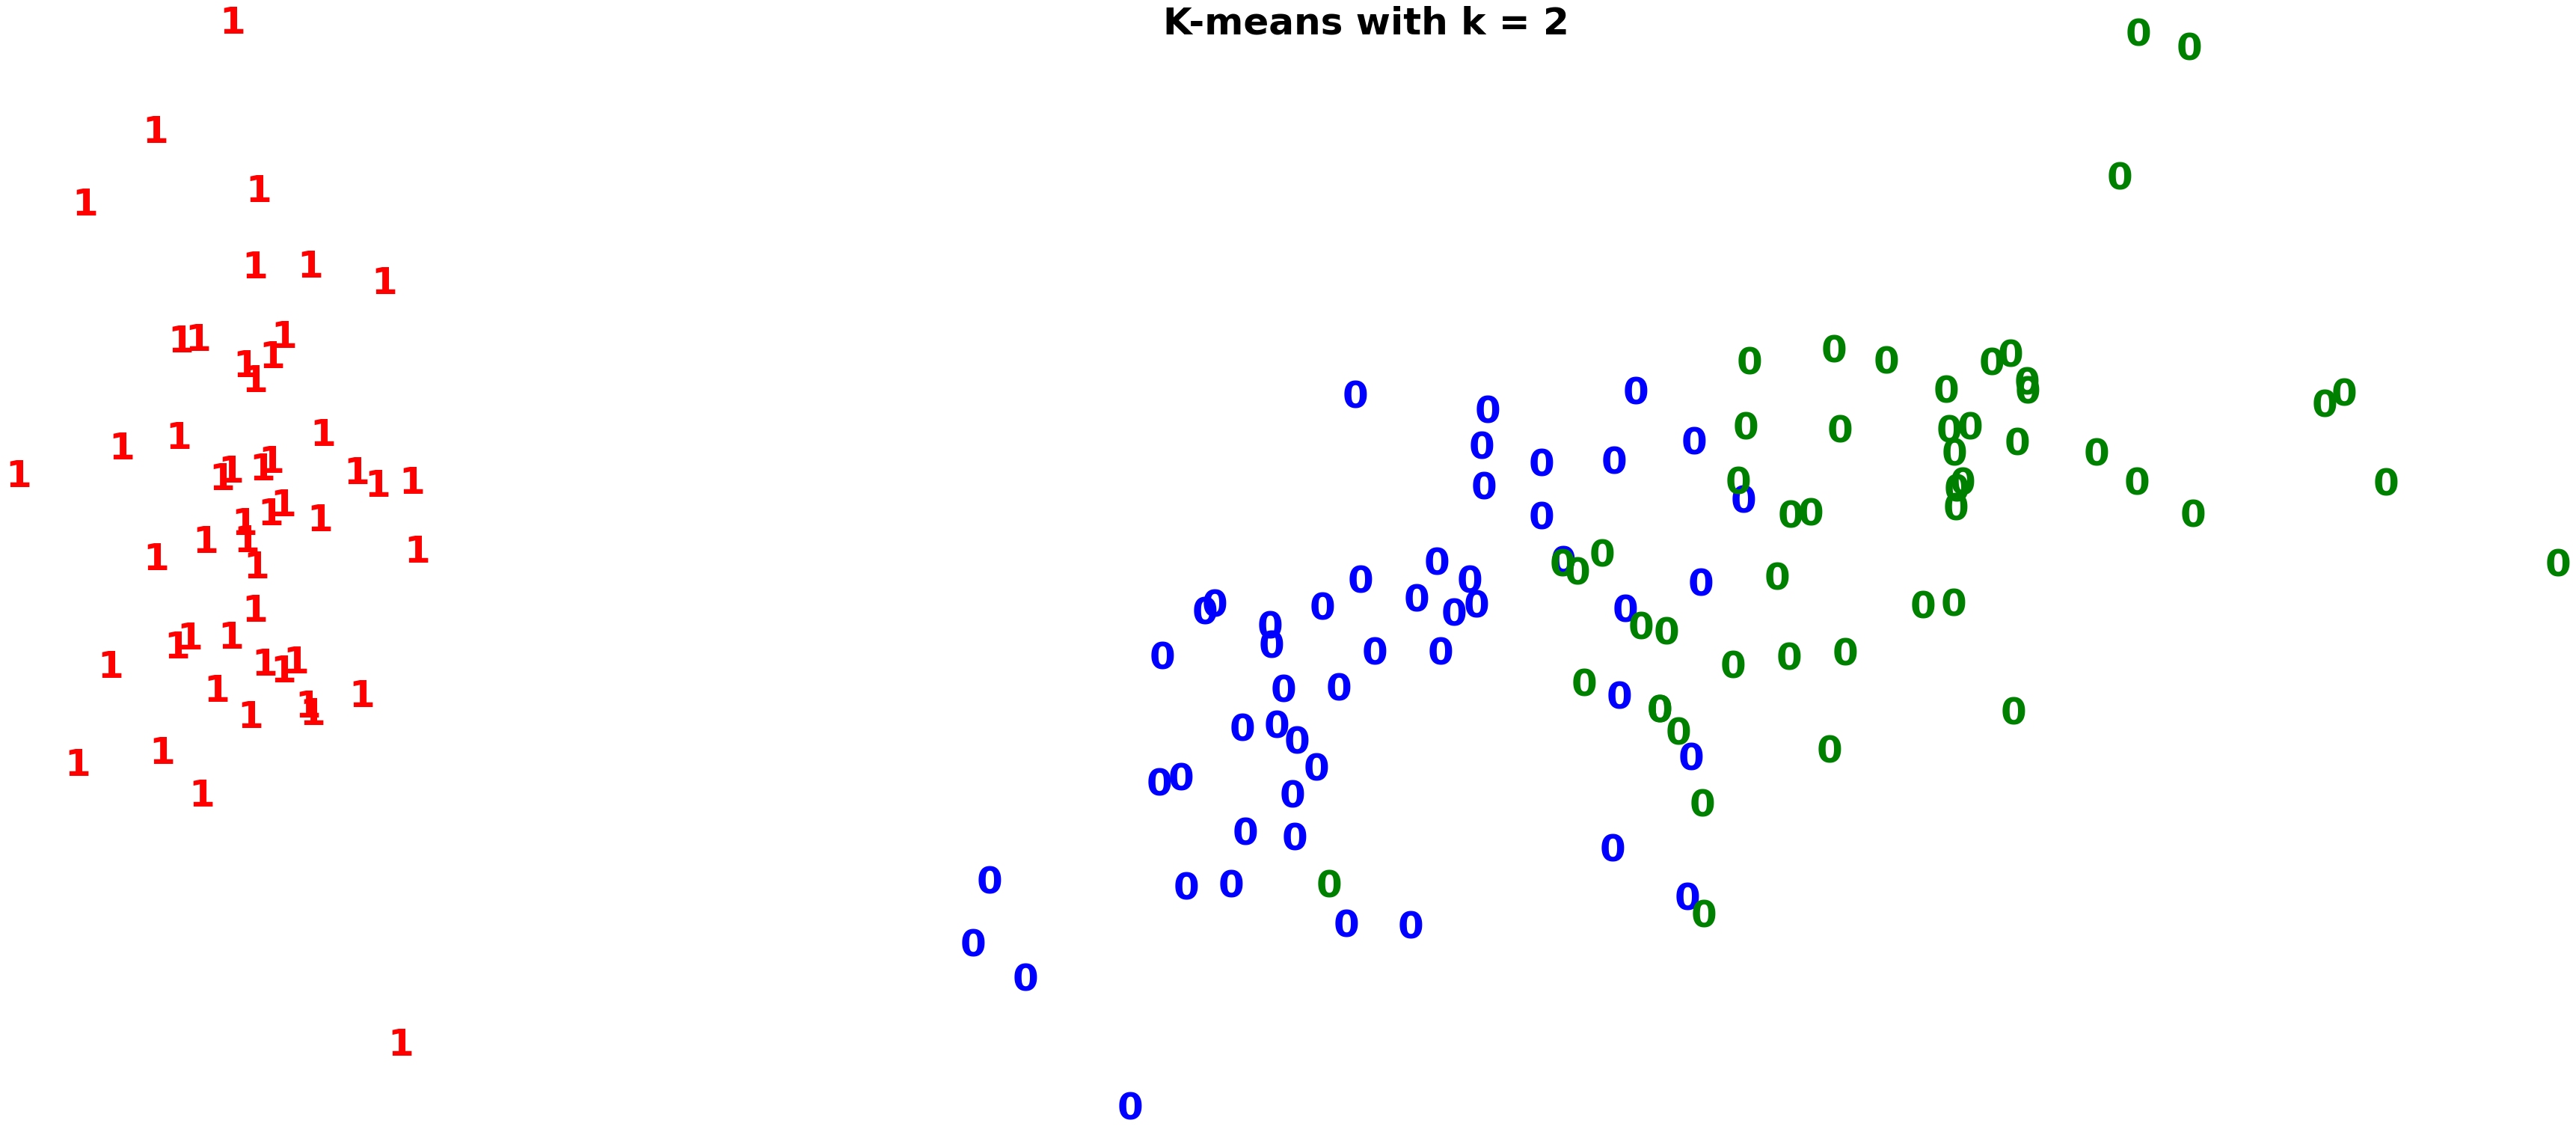

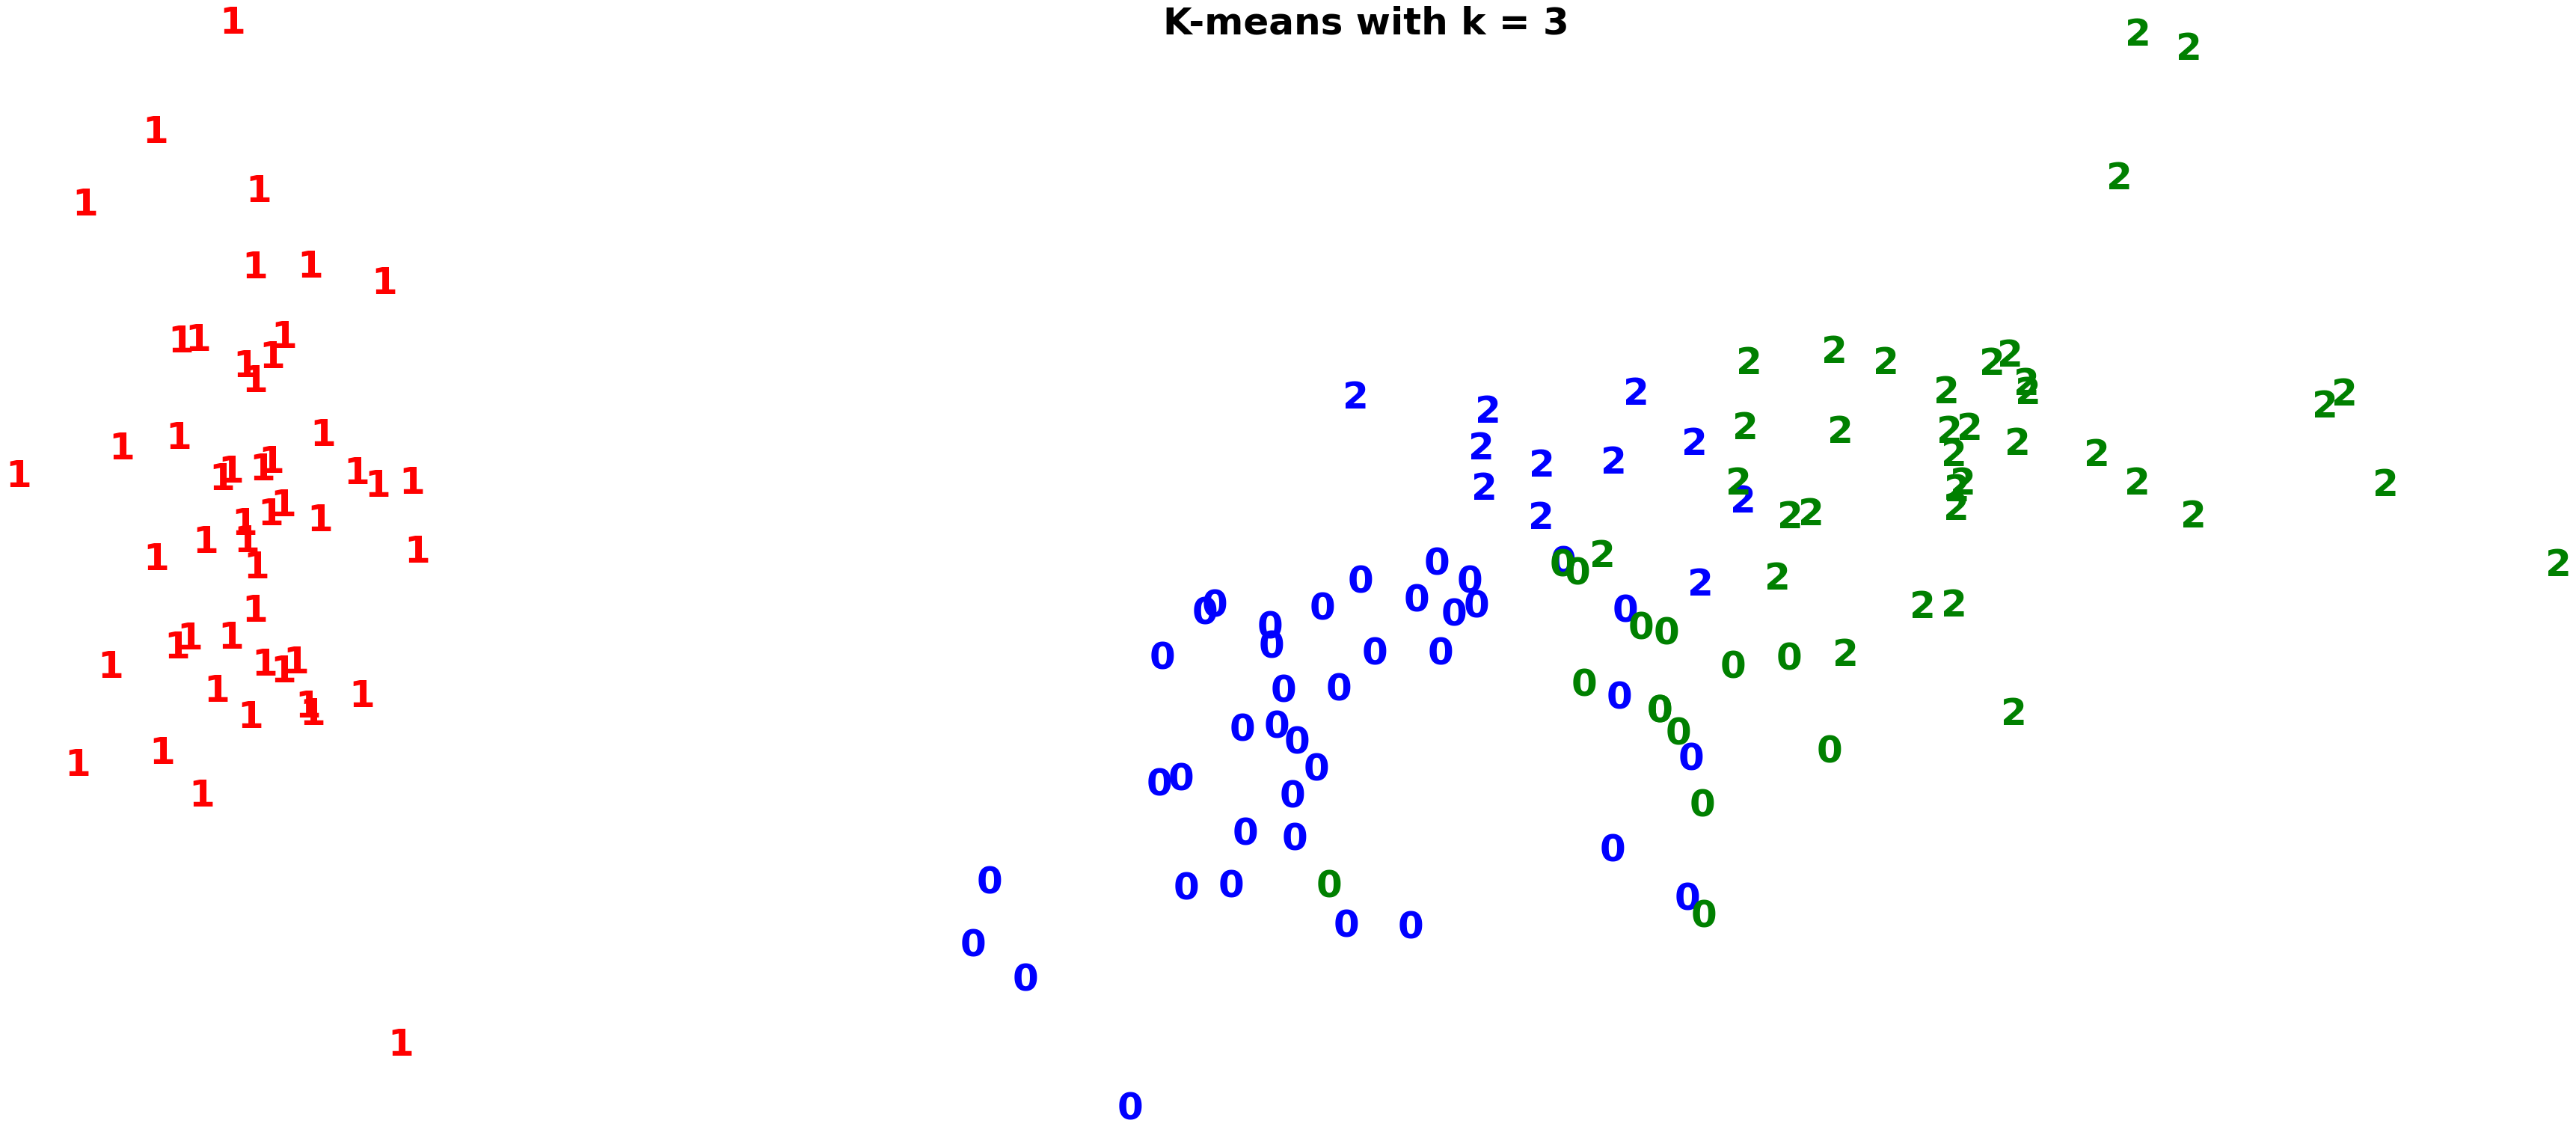

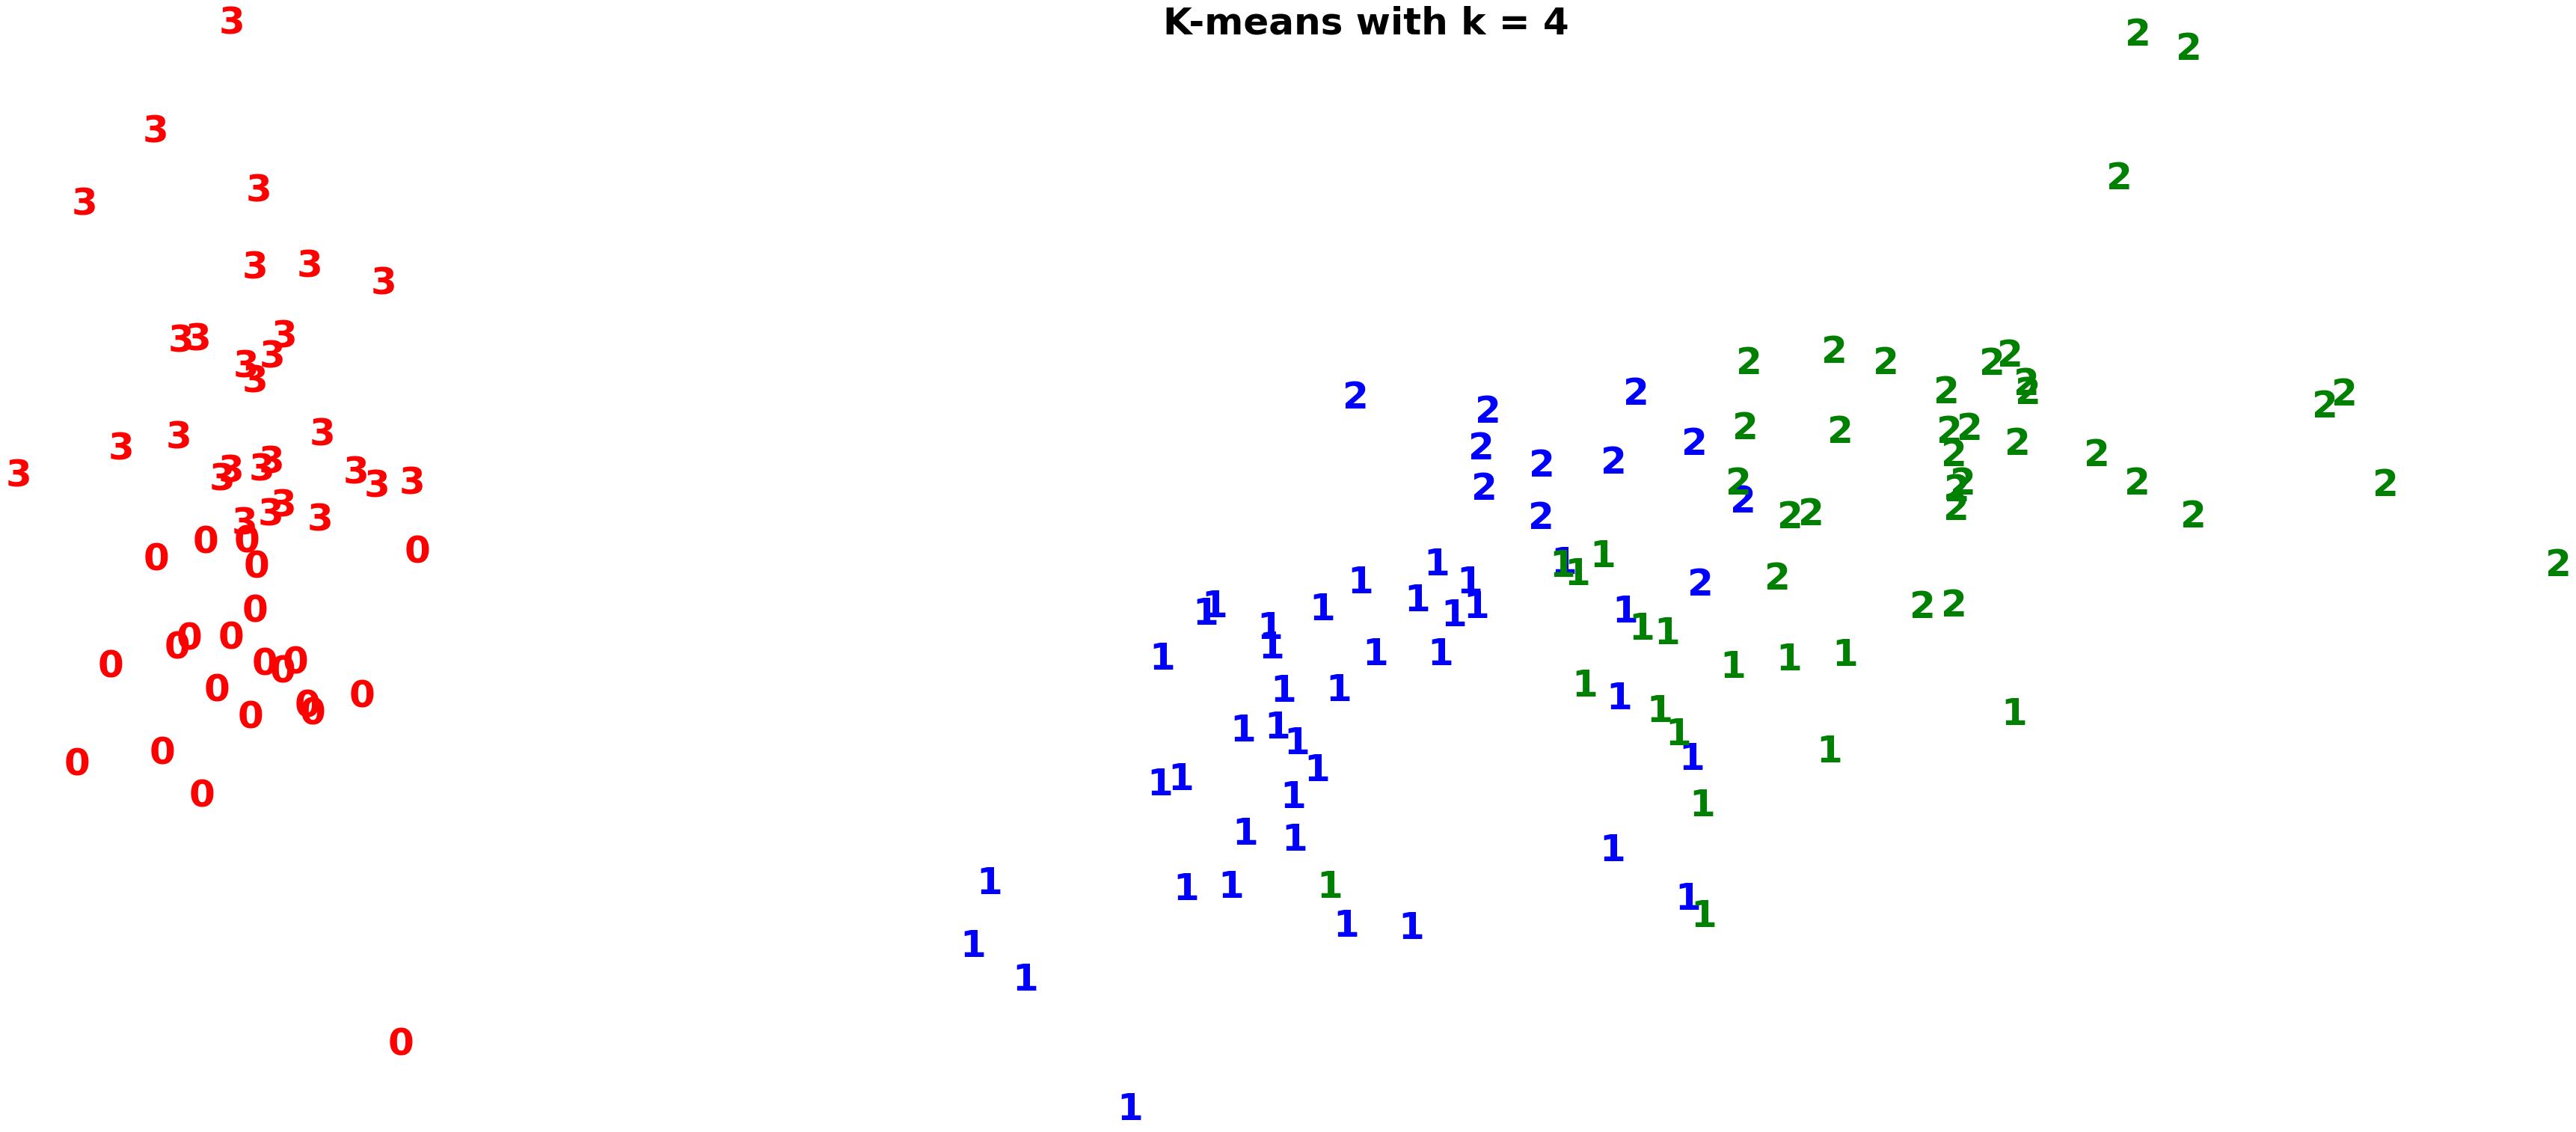

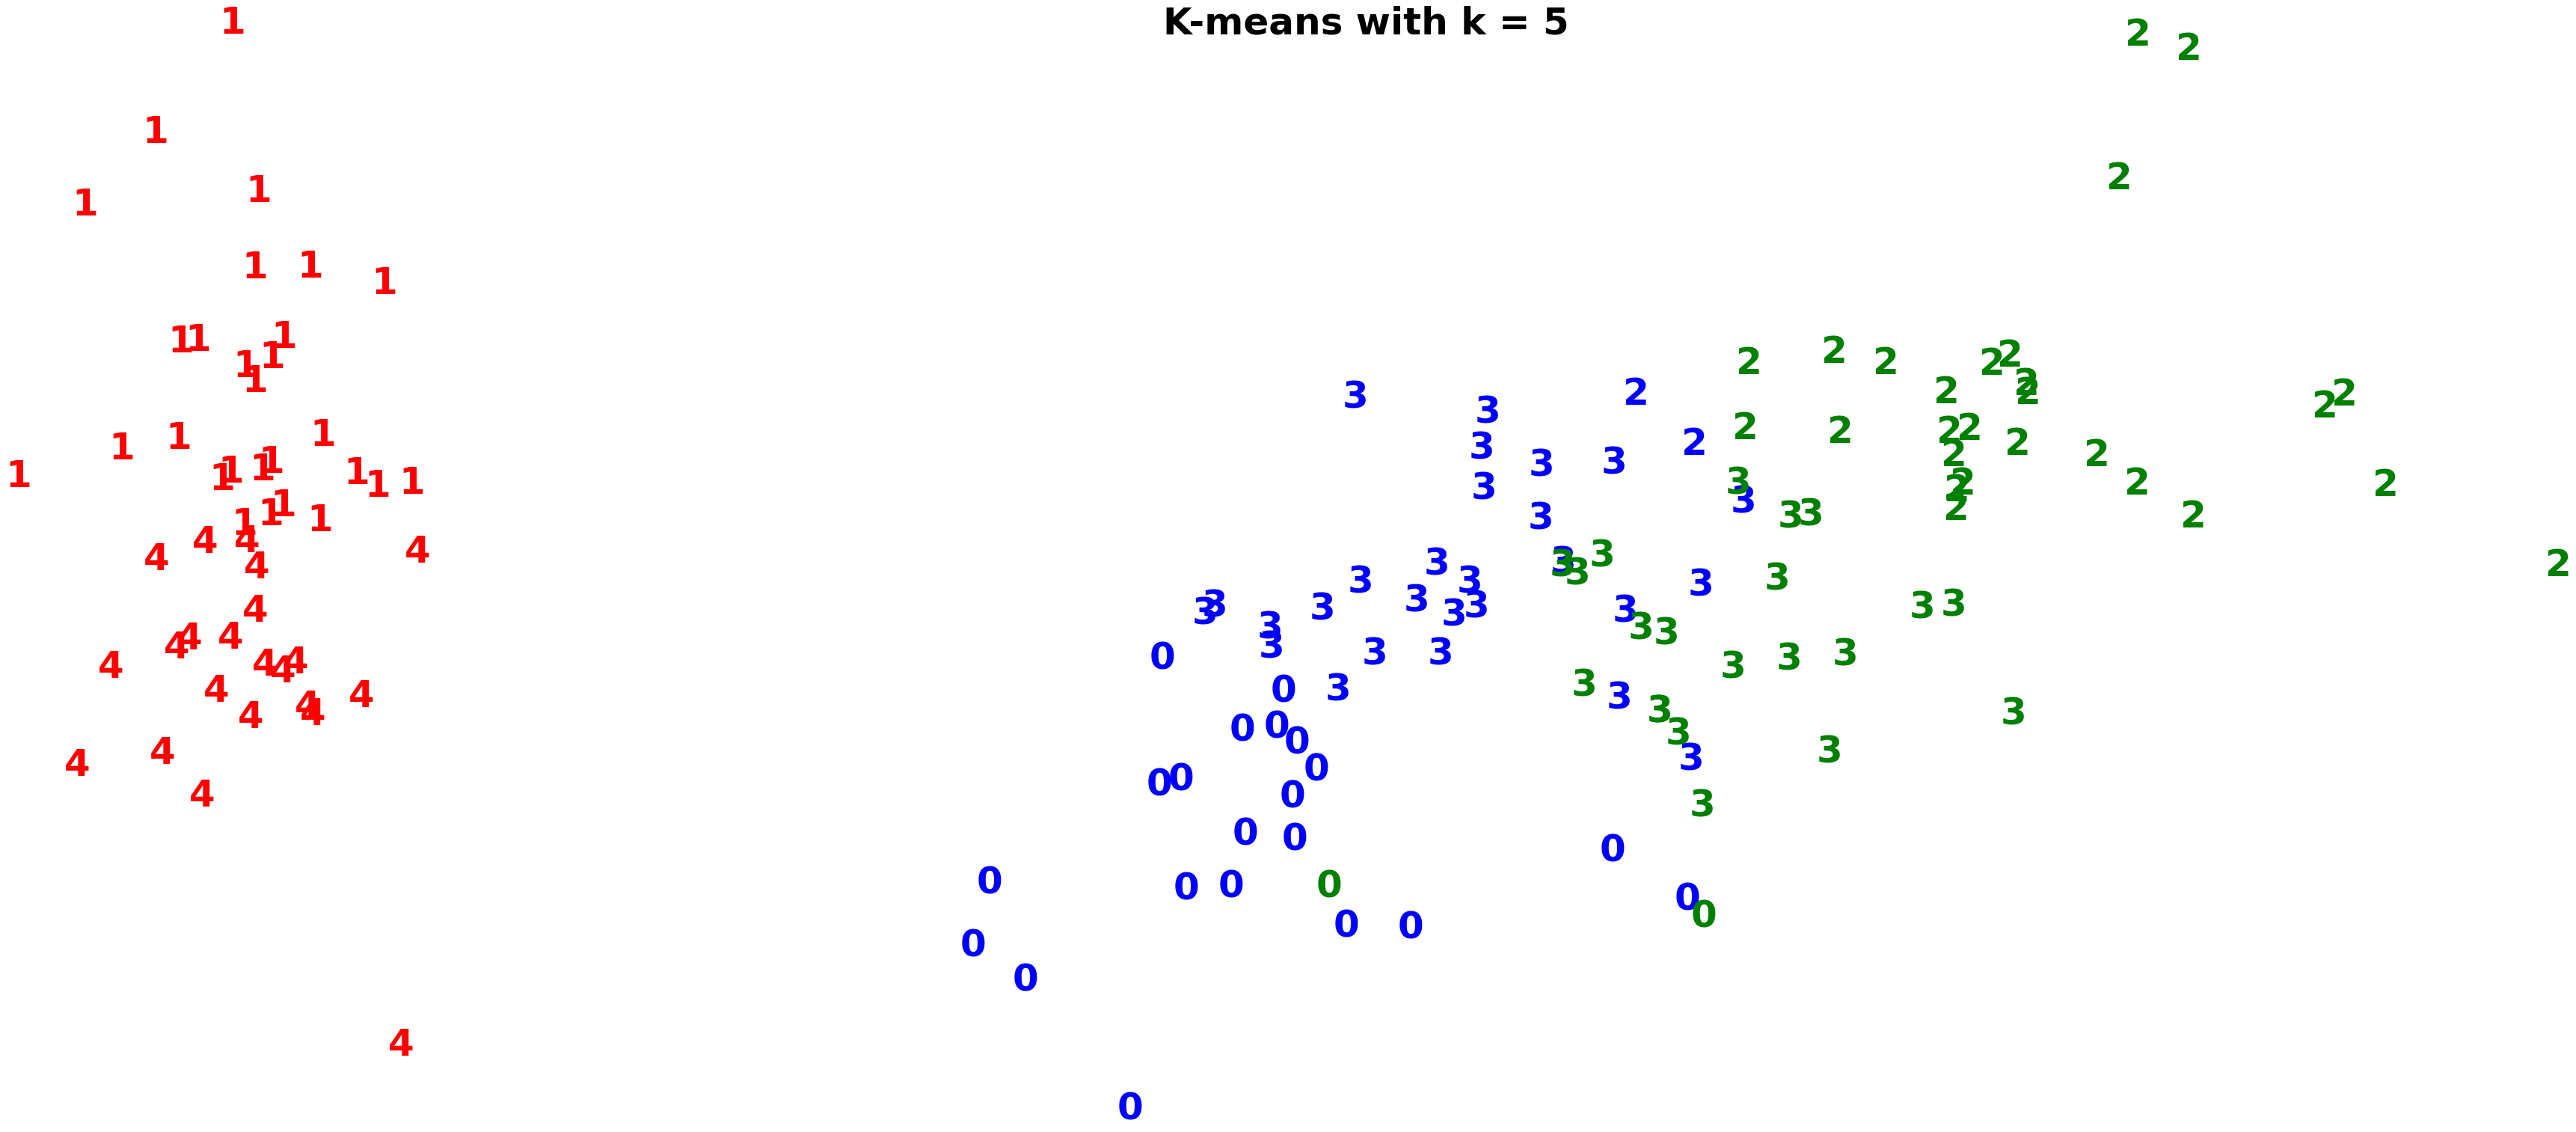

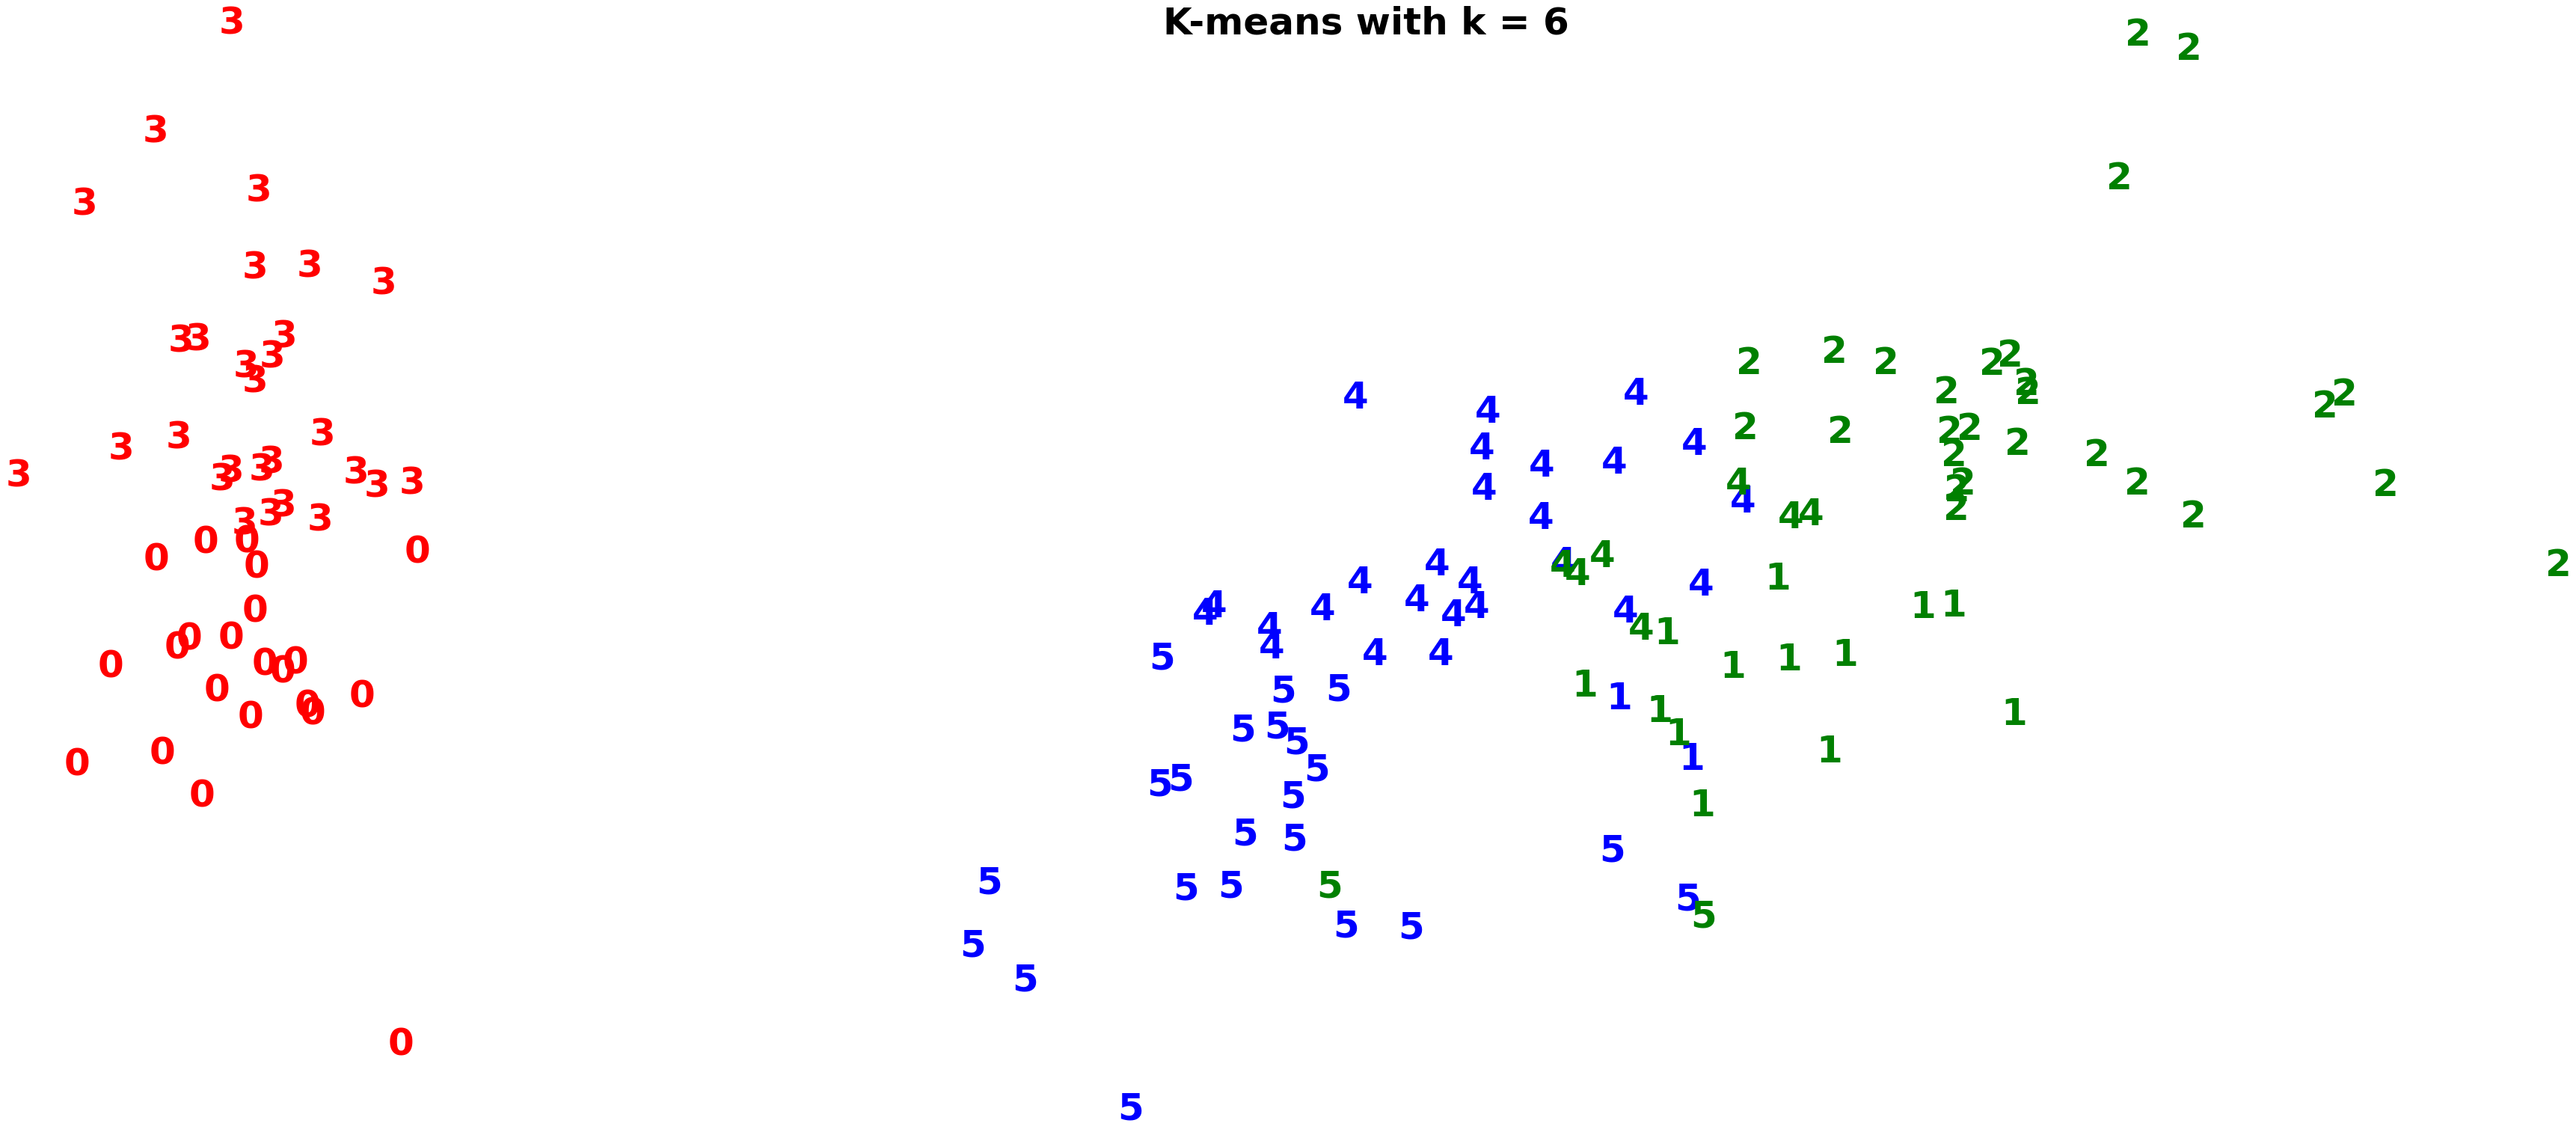

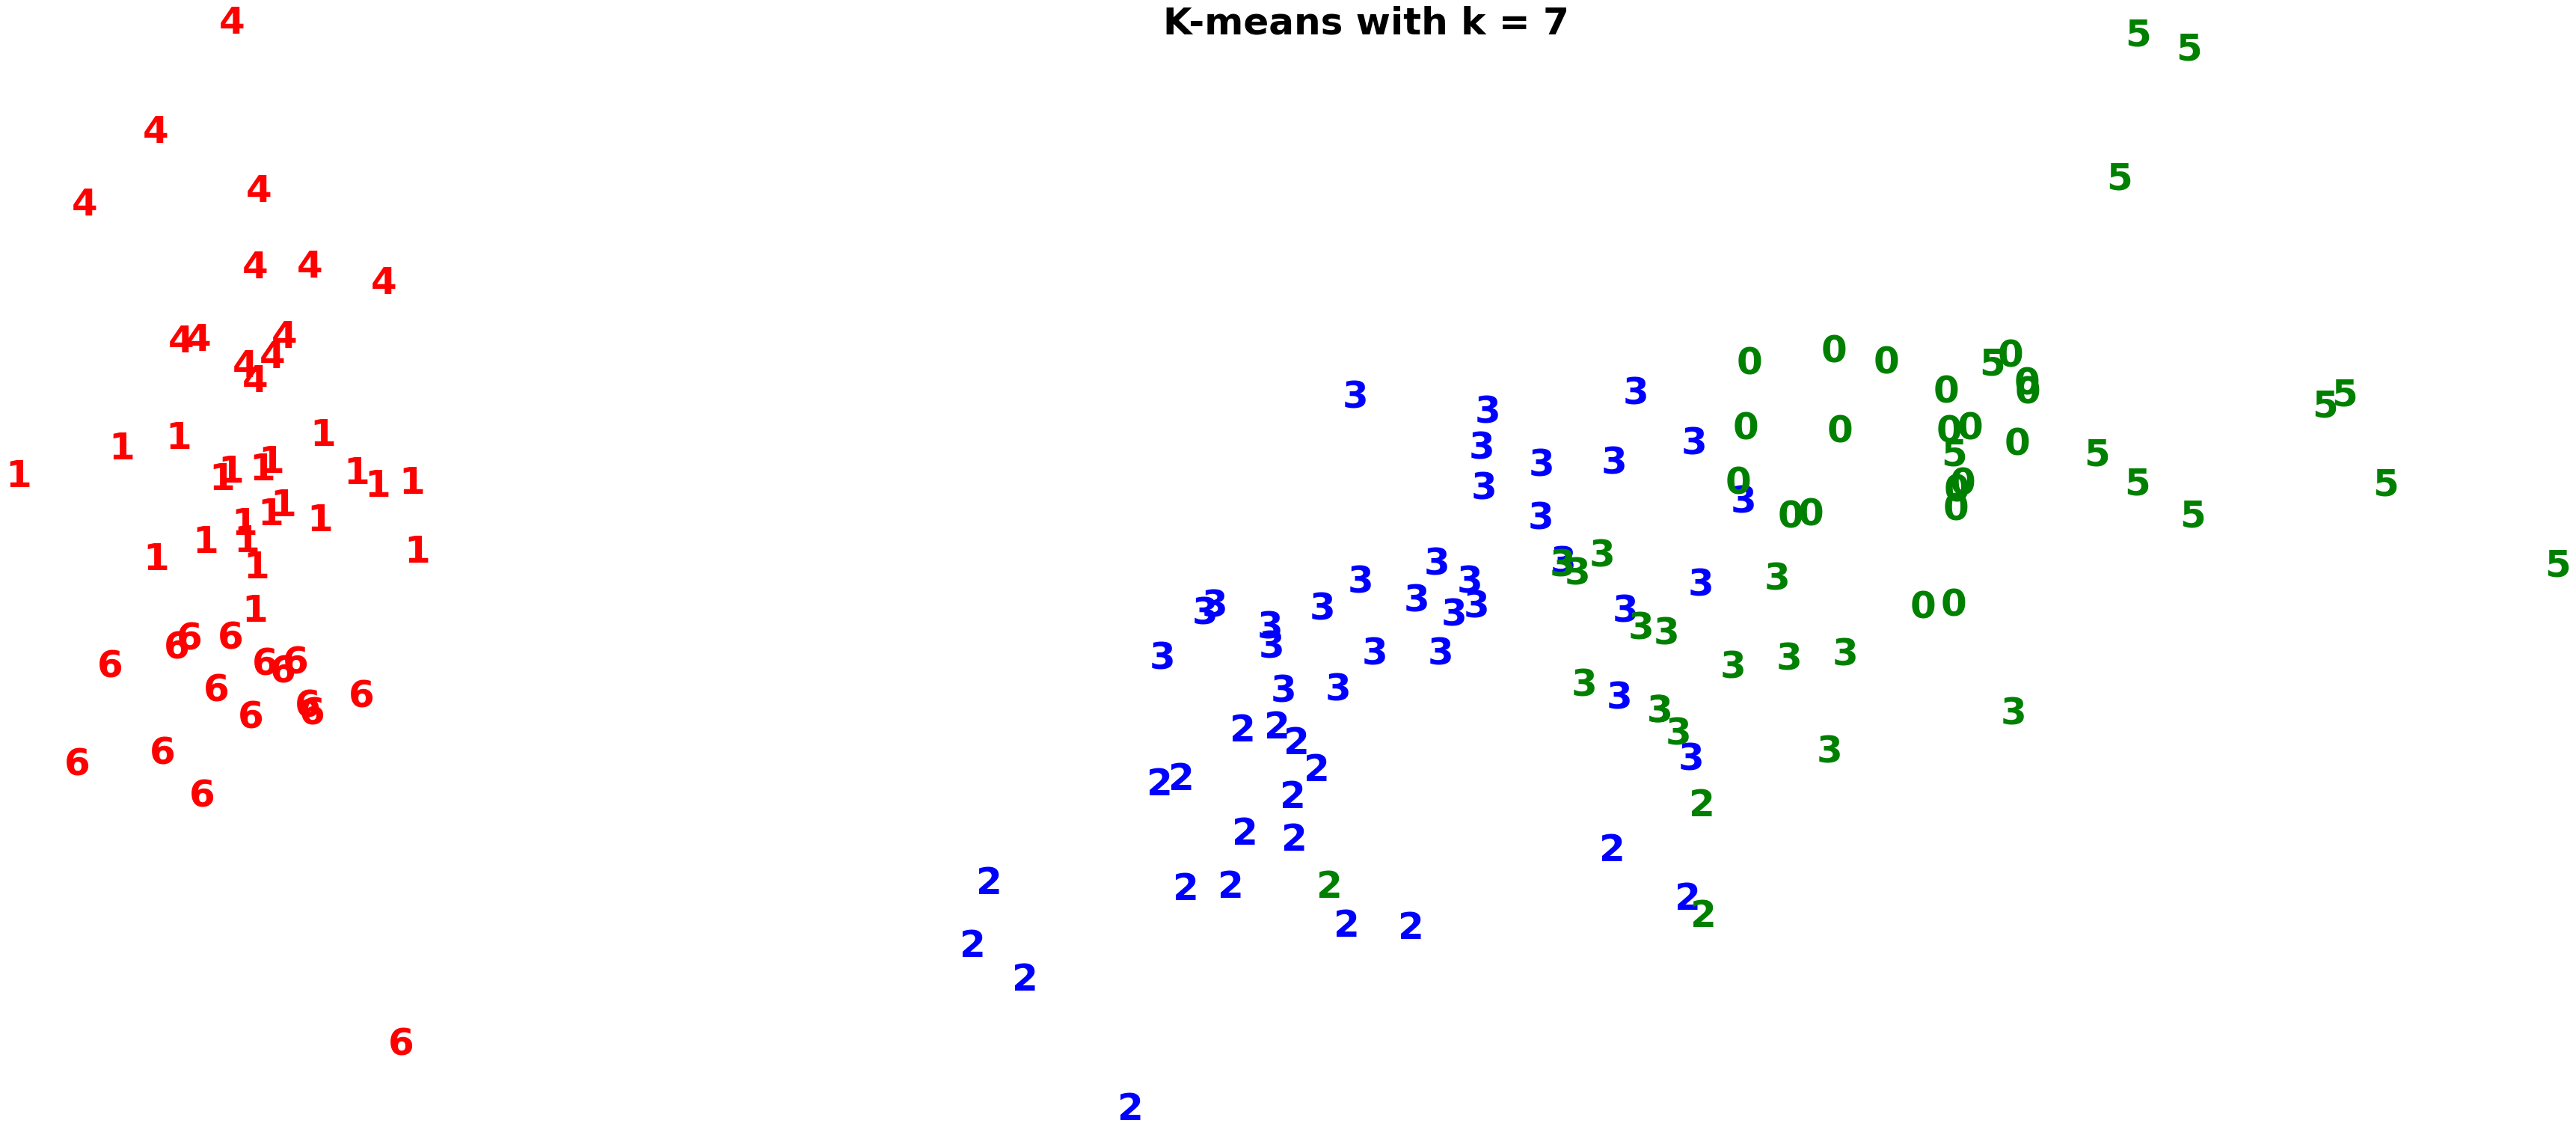

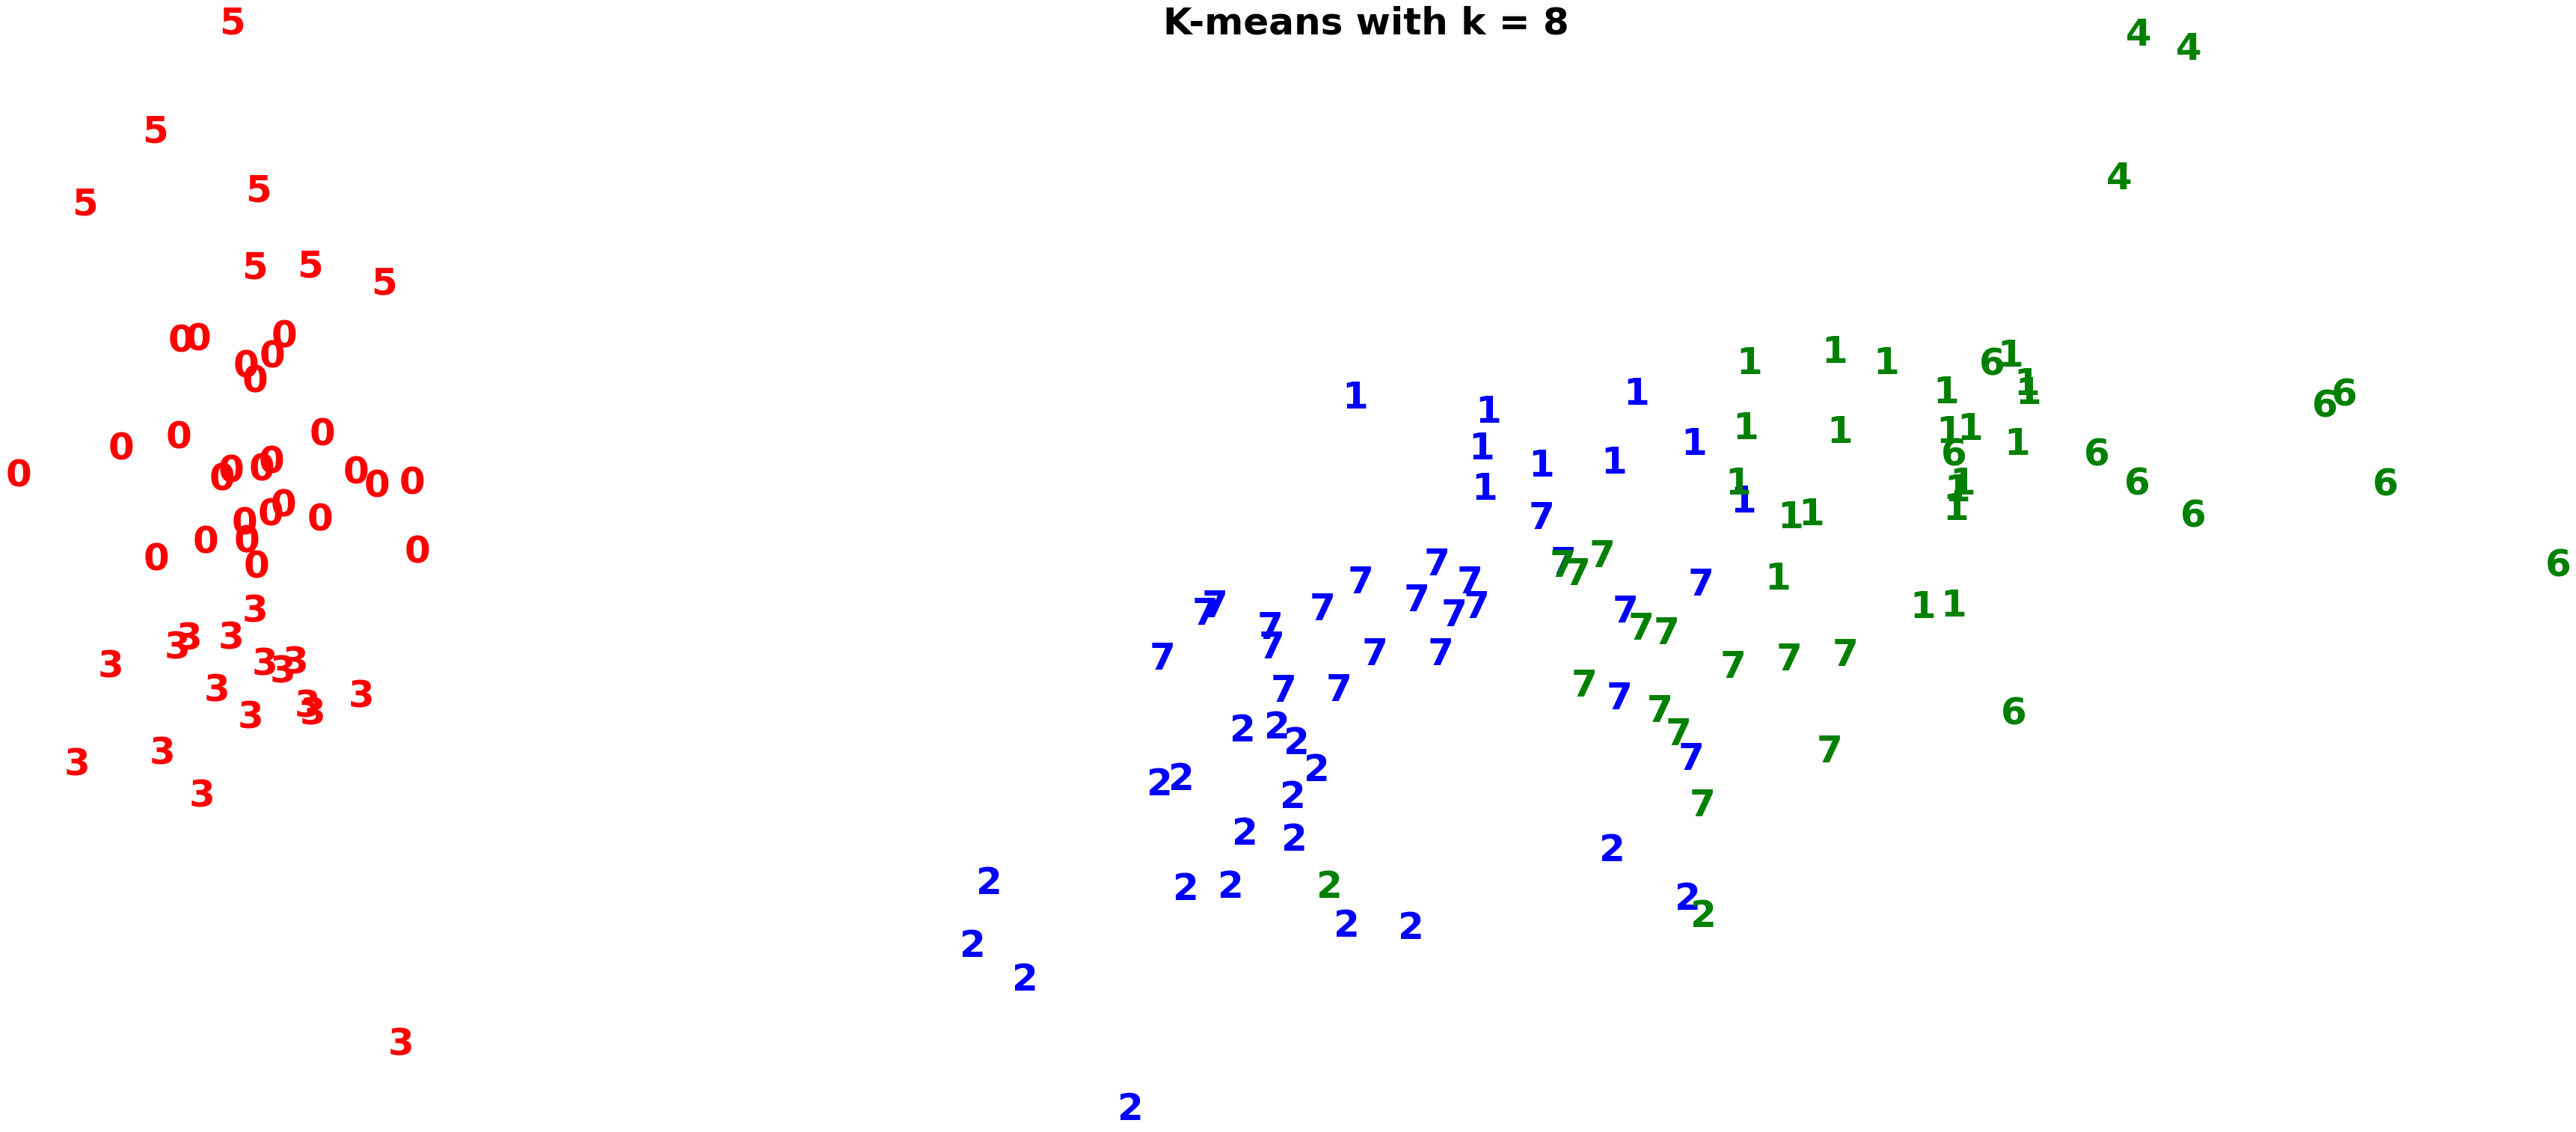

In [10]:
#Vlisualize k-means solutions

pca = PCA(n_components=2).fit_transform(X_std)

colours = 'rbg'
for i, solution in enumerate(k_means_clusters):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "K-means with k = {}".format(k_values[i]),
                 fontdict={'weight': 'bold', 'size': 50})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

A k-value of two correctly distinguished the linearly separable class from the other two as well as when k is 3. As we increase the value of k, the linearly separable class is grouped into multiple groups which is not ideal. In addition, there is little to no improvement when it comes to seperating the other flower types. At least one cluster always has a mix. Thus, a value of 3 is the best. 

2. Create a k-means solution that correctly assigns patients to heart disease diagnosis or no heart disease diagnosis clusters. 

In [13]:
from sqlalchemy import create_engine


import warnings
warnings.filterwarnings(action="ignore")


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [15]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

heartdisease_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [16]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 1, 0)

In [17]:
# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

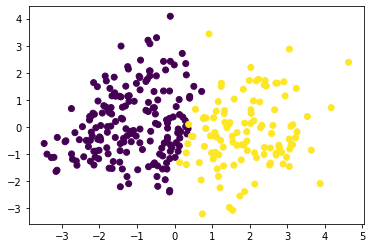

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0      151   38
1       13  101


In [25]:
pca = PCA(n_components=2).fit_transform(X_std)

y_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
# You will learn about cross-tabs/contingency
# tables in the next checkpoint
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))